# Анализ бизнес-показателей приложения Procrastinate Pro+

В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
purchases = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
events = None

In [3]:
def data_analys(data):
    data.columns = data.columns.str.lower() #приводим название столбцов к нижнему регистру
    data.columns = data.columns.str.replace(" ", "_") #приводим название столбцов к красивому стилю
    display(data.head(10))
    display(data.info())
    display(data.describe())
    duplicate = data.duplicated().sum() 
    print('Дубликатов :', duplicate) #проверим датасет на дубликаты
    
def datatime(data, column):
    data[column] = pd.to_datetime(data[column])

In [4]:
data_analys(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,user_id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


Дубликатов : 0


In [5]:
datatime(visits, 'session_start')
datatime(visits, 'session_end')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [6]:
data_analys(purchases)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Дубликатов : 0


In [7]:
datatime(purchases, 'event_dt')

purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
data_analys(ad_costs)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Дубликатов : 0


In [9]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Данные практически не требовали подготовки, в основном приводился в порядок внешний для последующей легкости работы с данными.**

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания профилей пользователей**

In [10]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для подсчёта Retention Rate**

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для подсчёта конверсии**

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для подсчёта LTV**

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция для сглаживания данных**

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция для построения графика Retention Rate**

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для построения графика конверсии**

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI**

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [18]:
users = get_profiles(visits, purchases, events, ad_costs)
users.sort_values(by='acquisition_cost', ascending=False)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
146333,975864617797,2019-10-11 08:08:04,TipTop,iPhone,United States,2019-10-11,2019-10-01,False,3.715385
98769,658088125802,2019-10-11 01:59:19,TipTop,iPhone,United States,2019-10-11,2019-10-01,True,3.715385
60726,402874163955,2019-10-11 01:25:37,TipTop,Mac,United States,2019-10-11,2019-10-01,False,3.715385
107727,717904110722,2019-10-11 23:31:06,TipTop,PC,United States,2019-10-11,2019-10-01,False,3.715385
11119,73808119380,2019-10-11 00:23:14,TipTop,Mac,United States,2019-10-11,2019-10-01,False,3.715385
...,...,...,...,...,...,...,...,...,...
72616,481952876872,2019-05-21 16:47:08,organic,Mac,UK,2019-05-21,2019-05-01,False,0.000000
72612,481939984583,2019-09-05 12:50:10,organic,iPhone,United States,2019-09-05,2019-09-01,False,0.000000
72607,481890220519,2019-05-24 13:37:56,organic,Mac,United States,2019-05-24,2019-05-01,False,0.000000
72600,481864823252,2019-05-19 21:00:47,organic,Android,France,2019-05-19,2019-05-01,False,0.000000


In [19]:
min_date = users['first_ts'].min()
max_date = users['first_ts'].max()
display(min_date)
display(max_date)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

**Выделил в отдельную ячейку минимальную и максимальную даты привлечения пользователей.**

In [20]:
(
    users.groupby(['region', 'device'])
    .agg({'user_id': 'nunique', 
          'payer' : ['sum', 'mean'],
         }
        )
    .sort_values(by='region', ascending=False)
)

user_id payer          
                      nunique   sum      mean
region        device                         
United States Android   20199  1487  0.073618
              Mac       24842  1706  0.068674
              PC        10432   715  0.068539
              iPhone    44529  2994  0.067237
UK            Android    5141   202  0.039292
              Mac        1778    63  0.035433
              PC         7138   301  0.042169
              iPhone     3518   134  0.038090
Germany       Android    4440   182  0.040991
              Mac        1584    61  0.038510
              PC         5945   253  0.042557
              iPhone     3012   120  0.039841
France        Android    5252   179  0.034082
              Mac        1838    82  0.044614
              PC         6940   268  0.038617
              iPhone     3420   134  0.039181

**Больше всего пользователей из United States (США), как и доля платящих за ними.**

**Наиболее высокая доля платящих пользвателей в США приходится на Android и Mac, в других странах Android также лидирует, но и PC не отстает. У iPhone очень низкая доля платящих, хотя достаточно много уникальных посетителей.**

In [21]:
(
    users.query('payer == True')
    .groupby('channel')
    .agg({'payer': 'count'})
    .sort_values(by='payer', ascending=False)
)

,payer
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


**Больше всего платящих пользователей приходится на канал FaceBoom, TipTop, organic**

In [22]:
(
    users.groupby('region')
    .agg({'user_id': 'nunique', 
          'payer' : 'mean',
         }
        )
    .sort_values(by='payer', ascending=False)
)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


**Подавляющее количество пользователей из США, как и доля платящих пользователей. Выделяется так же Германия, откуда наименьшее количество пользователей из представленных стран, но все же по уровню конверсии занимает второе место, следом за США.**

In [23]:
(
    users.groupby('device')
    .agg({'user_id': 'nunique', 
          'payer' : 'mean',
         }
        )
    .sort_values(by='payer', ascending=False)
)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


**Самая высокая доля платящих пользователей пользуется Mac, хоть и общее количество пользователей наименьшее из представленых устройств. Сразу же за Mac по доле платящих пользователей идет iPhone.**

In [24]:
(
    users.groupby('channel')
    .agg({'user_id': 'nunique', 
          'payer' : 'mean',
         }
        )
    .sort_values(by='payer', ascending=False)
)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


**В США самые платежеспособные клиенты и самые платежеспособные пользуются iPhone и Mac. Топ каналы: FaceBoom, AdNonSense, lambdaMediaAds и TipTop**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [25]:
display('Общая сумма расходов:', round(ad_costs['costs'].sum()))

'Общая сумма расходов:'

105497

<AxesSubplot:xlabel='month'>

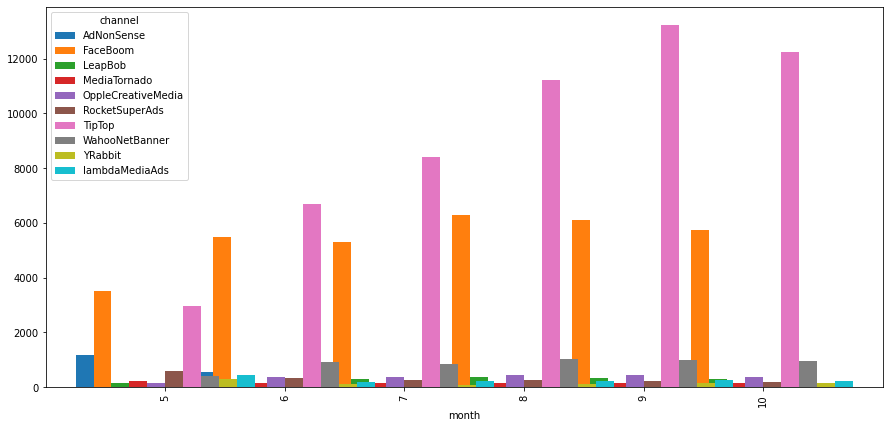

In [26]:
ad_costs['month'] = pd.DatetimeIndex(ad_costs['dt']).month

(
    ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(kind='bar', width=1.5, figsize=(15, 7))
)

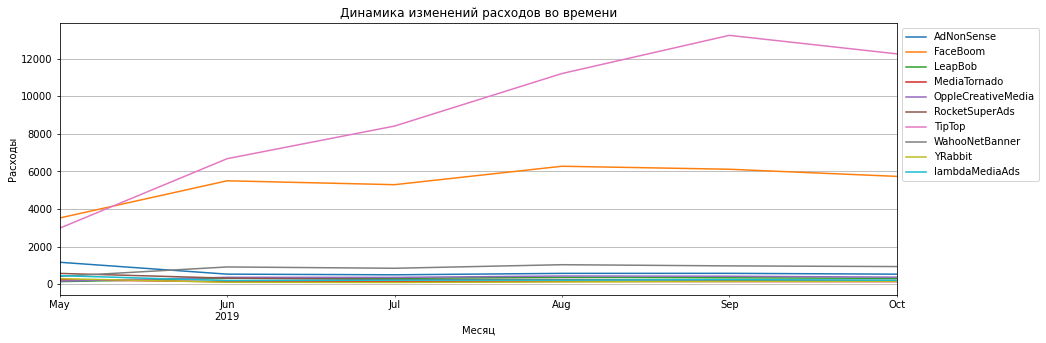

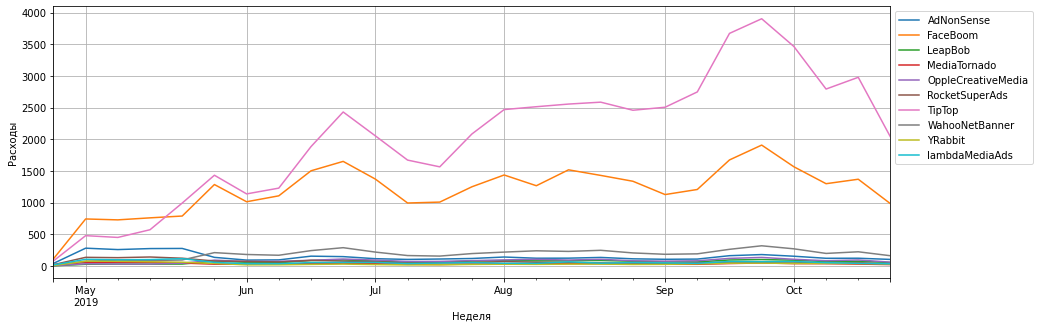

In [27]:
#создадим столбец с месяцами
ad_costs['month'] = ad_costs['dt'].astype('datetime64[M]')
ad_costs
 
ad_costs.pivot_table(
    index='month',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 5), grid=True)
 
plt.title('Динамика изменений расходов во времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()
 
#создадим столбец с неделями
ad_costs['week'] = ad_costs['dt'].astype('datetime64[W]')

ad_costs.pivot_table(
    index='week',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

**На TipTop и FaceBoom больше всего трат, что достаточно логично, т.к. от них приходит большое кол-во платящих клиентов.**

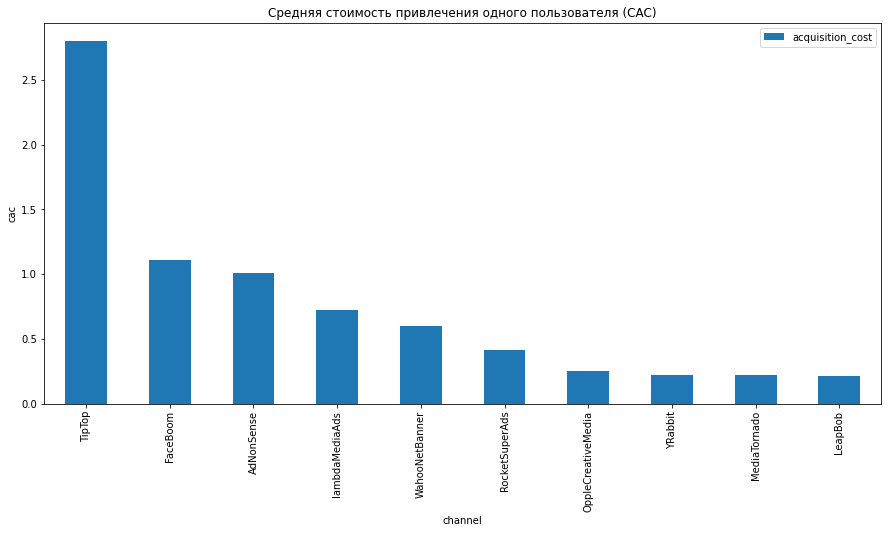

In [38]:
(
    users.query('acquisition_cost != 0')
    .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .plot(kind='bar', figsize=(15, 7))
    
)
plt.title('Средняя стоимость привлечения одного пользователя (CAC)')
plt.ylabel('cac')
plt.show()

**Самые дорогие пользователи у TipTop, FaceBoom и AdNonSens. WahooNetBanner может быть интересен, т.к от него приходит много платящих клиентов за не сильно большую стоимость. А вот lambdaMediaAds приносит мало пользователей, да еще дорогих.**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [46]:
users_wt_organic = users.copy()
drop_list_organic = users_wt_organic.query('channel == "organic"').index
users_wt_organic.drop(drop_list_organic, inplace=True)

**Удалим органических пользователей для последующего анализа.**

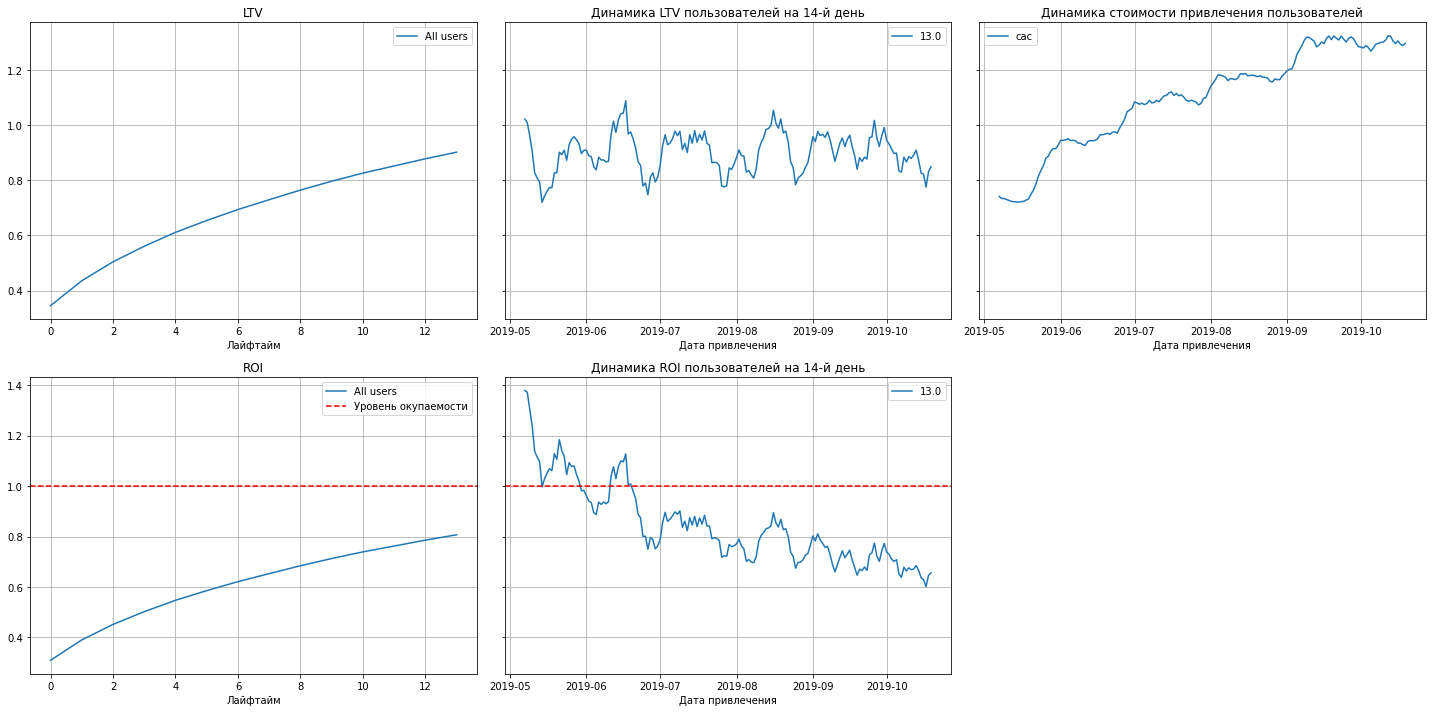

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users_wt_organic, purchases, datetime(2019, 11, 1).date(), 14)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

**LTV остановился на 0.9, т.е. средняя выручка с одного клиента равна 0.9 у.е.**
    
    
**Стоимость привлечения пользователей растет, что выше LTV 14-го дня. Что по итогу видно на графике ROI, т.е. затраты не окупаются**

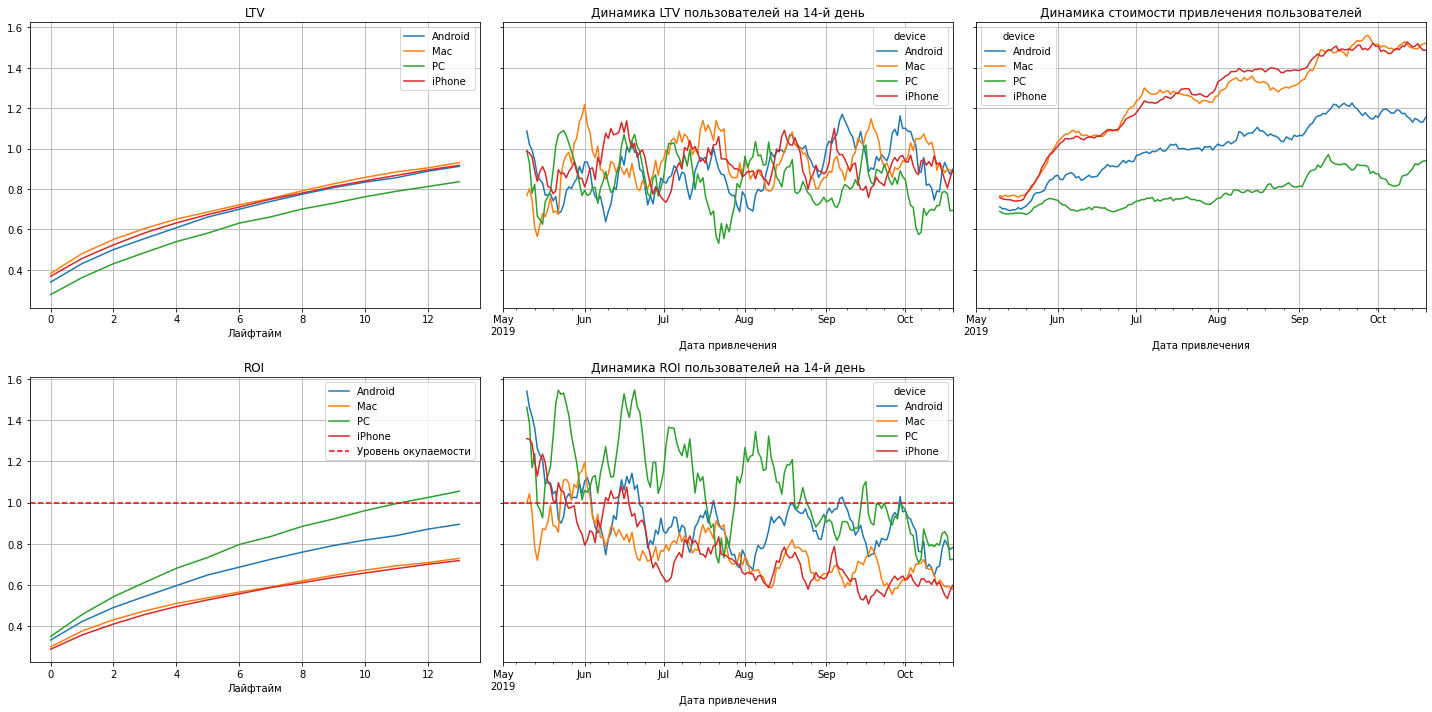

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users_wt_organic, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

**Лидер по LTV — пользователи на Mac. В динамике видно, что Мас в мае проваливался, но ниже всех остальных падал PC в июле.**
    
**А вот окупаемостью может похвастаться только РС, хоть и к концу "жизни". Самый худший ROI у iPhone и Мас.**
    
**Стоимость привлечения пользователей растет у всех, но у РС она остается самой низкой. Тогда как у iPhone и Мас она и растет быстрее и еще выше остальных.**

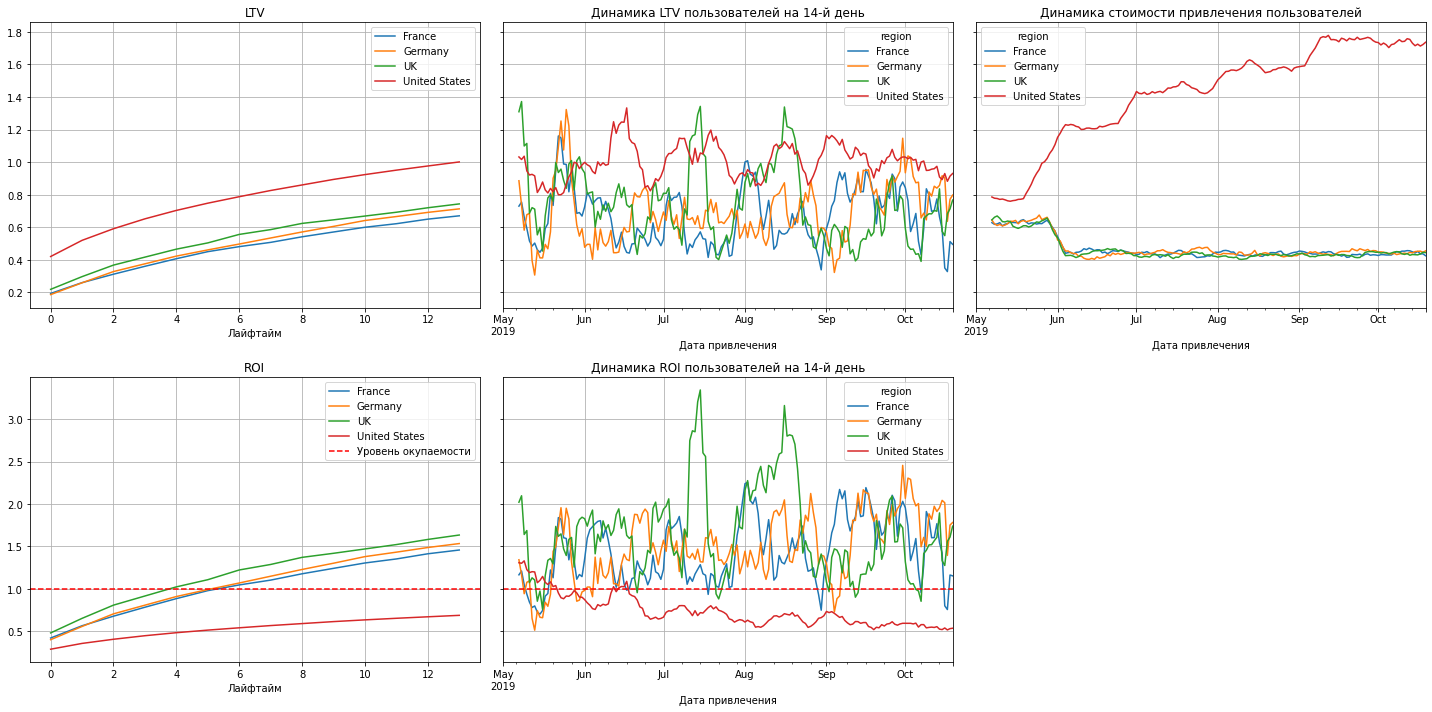

In [51]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users_wt_organic, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

**Лидер по LTV — пользователи США. В динамике так же хорошо себя показывает США. Но стоимость привлечения улетает вврех уже с мая, когда в тот же период остальные регионы показывают снижение и до конца "жизни" держаться на одном уровне.**
    
**Великобритания самая окупаемая страна, за ней идут Германия и Франция, которые тоже выше уровня окупаемости. А вот США с огромным количеством клентов плетется в хвосте стран и окупаемость отсутсвует**

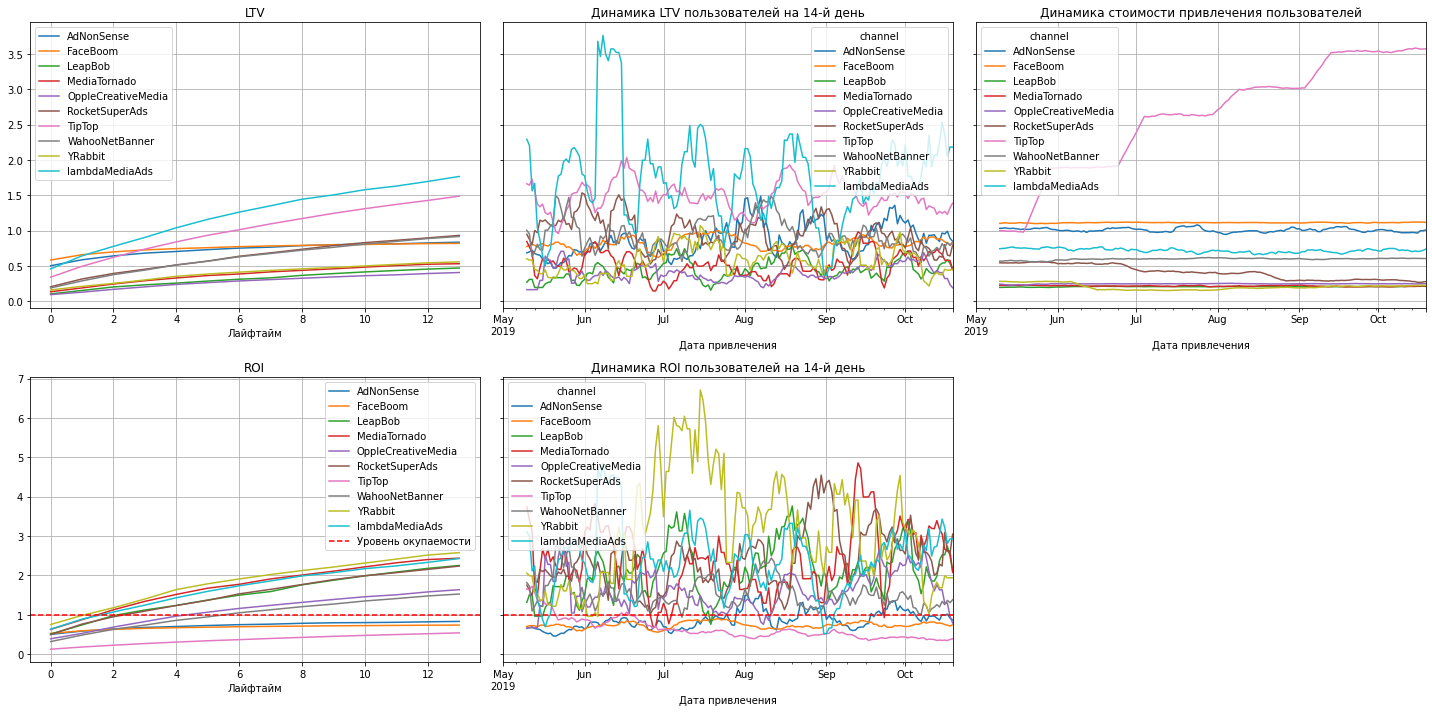

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    users_wt_organic, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

**По LTV  видно, что лидирует рекламный источник LambdaMediaAds за ним TipTop. По стоимости, LambdaMediaAds не самый дешевый, но все же с довольно стабильной стоимостью привлечения пользователей. Когда как TipTop летит с места в карьер по увеличению стоимости привлечения. YRabbit и MediaTornado по стоимости самые низкие варианты из представленных, а так же одни из самых окупаемых рекламных источников рядом с которыми так же идет LambdaMediaAds, а вот TipTop дальше всех от окупаемости.**

**Т.к. TipTop имеет самую дорогую стоимость привлечения, то это повлияло на его окупаемость в целом, т.е. она отсутствует. Так же неокупаемы еще два канала: AdNonSense и FaceBoom, хоть их стоимость привлечения ниже TipTop.**

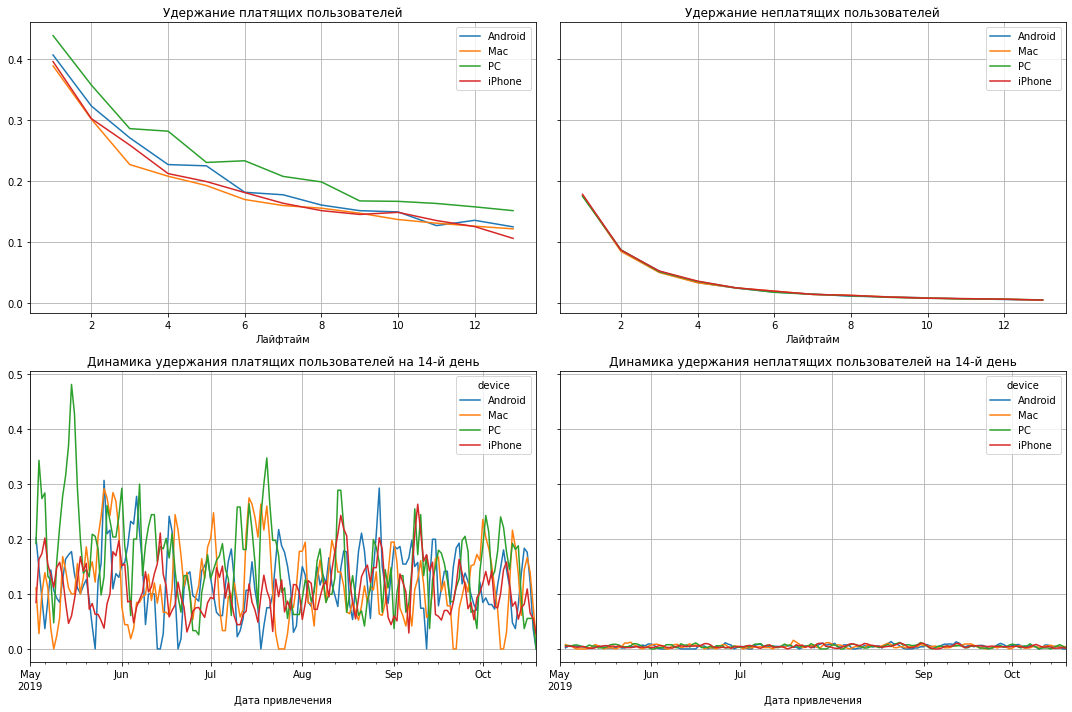

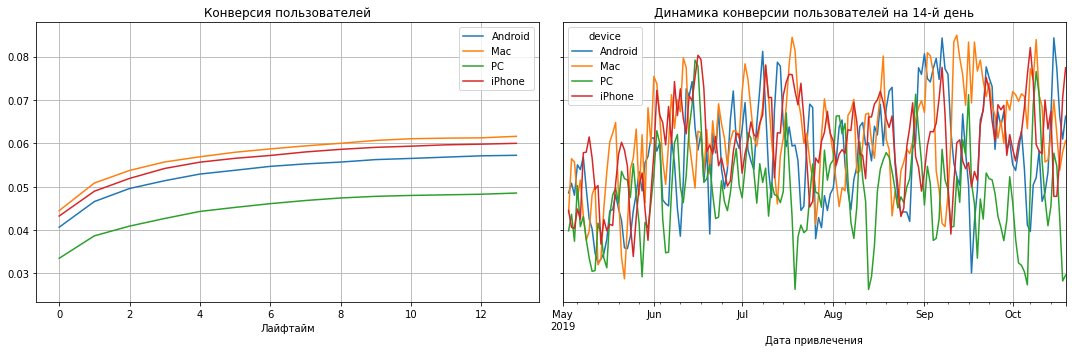

In [33]:
retention_raw, retention, retention_history = get_retention(
    users, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
    
conversion_raw, conversion, conversion_history = get_conversion(
    users, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
    
plot_retention(retention, retention_history, 14, window=3)
plot_conversion(conversion, conversion_history, 14, window=3)

**С РС приходят самые долго живущие с нами пользователи, а с iPhone и Мас теряют интерес быстрее, но с конверсией у них все в порядке, выше остальных устройств.**

**Нужно проанализировать приложение на наличие технических ошибок для iPhone и Мас.**

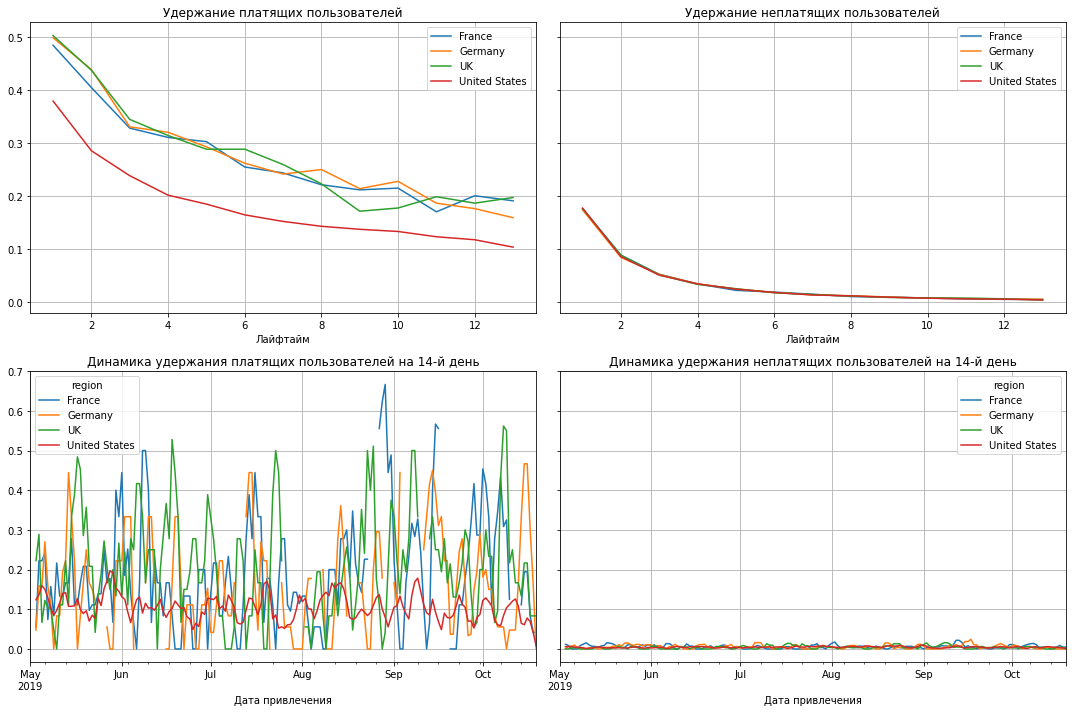

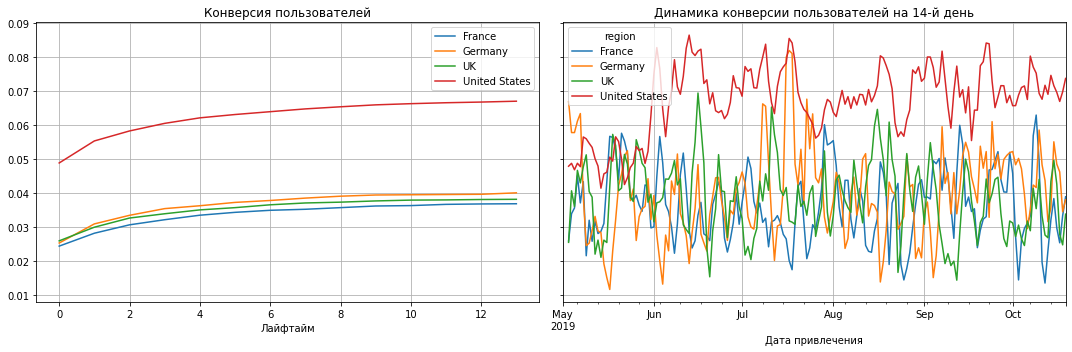

In [34]:
retention_raw, retention, retention_history = get_retention(
    users, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region'])
    
conversion_raw, conversion, conversion_history = get_conversion (users, purchases, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['region'])
    
plot_retention (retention, retention_history, 14, window=3)
plot_conversion (conversion, conversion_history, 14, window=3)

**Снова в хвосте США по удержанию платящих клиентов, а вот конверсия выше остальных, возможно из-за Android.**

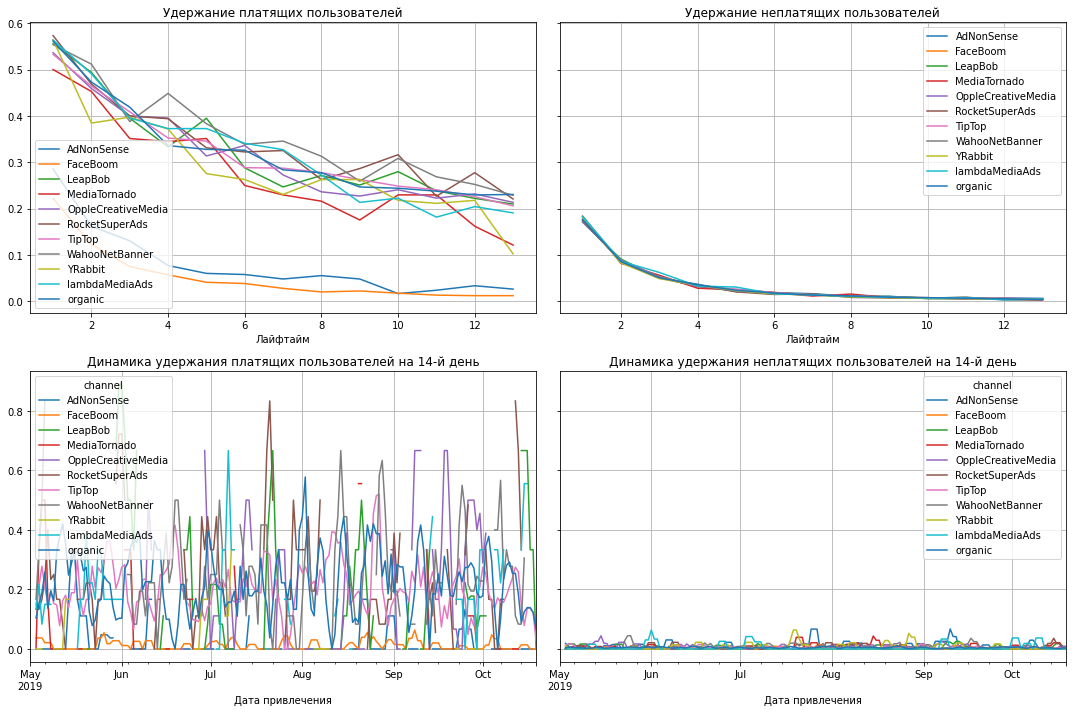

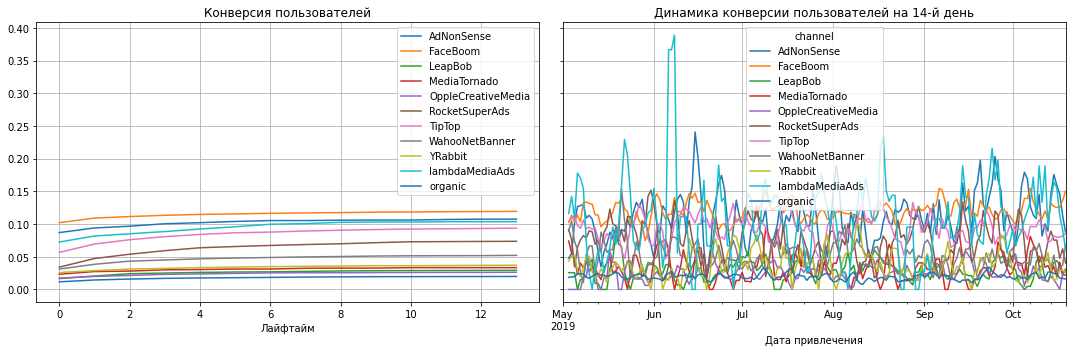

In [35]:
retention_raw, retention, retention_history = get_retention(
    users, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])
    
conversion_raw, conversion, conversion_history = get_conversion (users, purchases, datetime(2019, 11, 1).date(), 14, 
                                                                 dimensions=['channel'])
    
plot_retention (retention, retention_history, 14, window=3)
plot_conversion (conversion, conversion_history, 14, window=3)

**С канала FaceBoom приходят клиенты, которые не долго находятся с нами, хоть и конверсия самая высокая из каналов. Как ранее говорилось, канал WahooNetBanner интересная площадка с качественными клиентами и с хорошей ценой.**

**После проведенного анализа можно сделать вывод, что реклама не окупается. Причин тому несколько:**

1) пользователи с iPhone и Mac . Их много, конверсия хорошая, но по каким-то причинам довольно быстро уходят от нас, возможно на моменте оплаты происходит ошибка. Так же имеют высокую стоимость привлечения, отчего может страдать окупаемость;
    
2) высокая стоимость привлечения пользователей через рекламные источники: TipTop, AdNonSense и FaceBoom, но с хорошей конверсией. Возможная причина в том, что реклама работает не совсем на нужную аудиторию и после покупки пользователи получают не то, что хотели;
    
3) высокая стоимость привлечения пользователей из США.

**Причины неэффективности:**

- США с огромным количеством клиентов, но с низким уровнем удеражния и неокупаемостью инвестиций
- TipTop не оправдывает вложенных в него средств. В AdNonSense и FaceBoom у которых, стоимость привлечения хоть и стабильна на протяжении "жизни", в сравнении с TipTop, но все же высокая, чтобы выйти на окупаемость. Так же возможная причина, что платящие пользователи пришедшие через каналы AdNonSense и FaceBoom мало находятся с нами
- На iPhone и Mac возможно имеются проблемы при покупке в приложении, в связи с чем удержание у этих устройств ниже остальных

**Рекомендации:**

- На каналы YRabbit, MediaTornado и lambdaMediaAds выделить бюджет 
- Скорректировать рекламные компании в FaceBoom, AdNonSense и TipTop, а именно проверить возможные тарифы/акции для снижения стоимости, а также на какую категорию реклама рассчитана
- Проверить функциональность приложения с устройства iPhone и Mac, на наличие ошибок при оплате